<b>Intro:</b><br>
Many ML datasets being very large cause extremely slow training
<br> coz of curse of dimensionality
<br> Here Dimensionality reduction comes to the rescue

# Methods: PCA, Kernel PCA and LLE

# PCA in sklearn

Uses SVD

Trying it on mnist

In [114]:
import tensorflow as tf
import numpy as np
import sklearn

In [7]:
mnist = tf.keras.datasets.mnist.load_data()

In [8]:
(X_train, y_train), (X_test, y_test) = mnist

In [10]:
X_train[0].shape

(28, 28)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components = 28)

In [13]:
X2D = pca.fit_transform(X_train[0])

In [14]:
X2D.shape

(28, 28)

In [15]:
import matplotlib.pyplot as plt

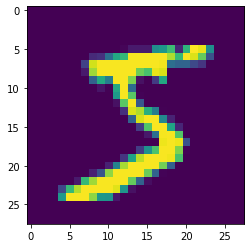

In [16]:
plt.imshow(X_train[0])

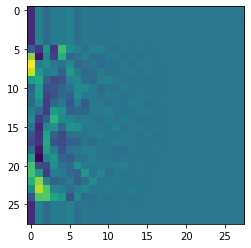

In [17]:
plt.imshow(X2D)

In [18]:
[float(i) for i in list(pca.explained_variance_ratio_)]

[0.37533310619061844,
 0.28934592636736234,
 0.13141808219100087,
 0.07495061901315125,
 0.059584044668071344,
 0.02863764704542524,
 0.017522583878660233,
 0.011468295784569359,
 0.004358291098990933,
 0.0028765339674615698,
 0.0015312504222843735,
 0.0011171732389022196,
 0.001044851369448191,
 0.00033926770156016595,
 0.0002677776810026035,
 0.00011975837590252508,
 7.204266268851055e-05,
 1.22670840800518e-05,
 4.811848412377421e-07,
 7.397854256887872e-11,
 3.897950687016142e-33,
 3.370387679180236e-33,
 3.370387679180236e-33,
 3.370387679180236e-33,
 3.370387679180236e-33,
 3.370387679180236e-33,
 3.370387679180236e-33,
 2.6540281539852424e-33]

Variance is something that holds the information containing in data, more the variance in PCA, more information is preserved.

# Choosing right number of dimensions in PCA

Components that add up to make 95% of the variance are considered good

In [19]:
pca = PCA()

In [20]:
pca.fit(X_train[0])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

calculate cumulative sum

In [21]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [22]:
d = np.argmax(cumsum >= 0.95)

In [23]:
d

5

Select 5 principal components

In [24]:
pca = PCA(n_components=5)

In [25]:
X5D = pca.fit_transform(X_train[0])

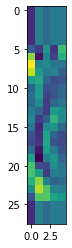

In [26]:
plt.imshow(X5D)

Better option:

In [27]:
pca = PCA(n_components=0.95)

In [28]:
X95var = pca.fit_transform(X_train[0])

### Another method: elbow method

<b>Steps to find n_components:<br></b>
plot Dimensions vs Variance using for loop<br> where dimensions are in range(0, no. of feature columns)<br>
find "elbow point" at which variance starts to flat out sharply<br>
take projection of elbow point on Dimension axis and find ideal dimensions

# PCA as compressor/decompressor

lets try

In [55]:
pca = PCA(n_components=5)

In [56]:
X_95var = pca.fit_transform(X_train[0])

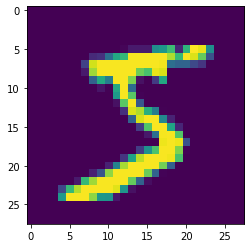

In [57]:
plt.imshow(X_train[0])

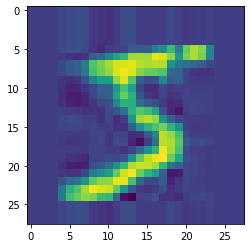

In [58]:
plt.imshow(pca.inverse_transform(X_95var))

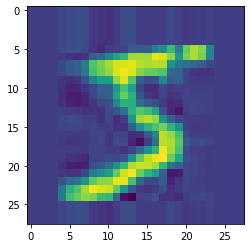

In [77]:
plt.imshow(pca.inverse_transform(X_95var))

Okay, not original

Oh, something called reconstruction error caused that thing

### Randomized PCA

set svd_solver = 'randomized' and it quickly finds approximation of first d principal component's projection

It is slightly faster than finding projections using full svd approach only if input data is larger than 500 * 500

In [33]:
randomized_pca = PCA(n_components=5, svd_solver='randomized')

In [34]:
X_reduced = randomized_pca.fit_transform(X_train[0])

### Incremental PCA

If the dataset is too large to load in memory, we can use incremental PCA<br>
It will partially fit the training set in small batches

In [35]:
from sklearn.decomposition import IncrementalPCA

In [36]:
ipca = IncrementalPCA(n_components=2)

In [37]:
n_batches = 2
for X_batch in np.array_split(X_train[0], n_batches):
    ipca.partial_fit(X_batch)

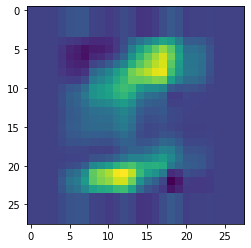

In [38]:
plt.imshow(ipca.inverse_transform(ipca.transform(X_train[1])))

# Kernel PCA

Kernel PCA uses Kernel Trick

<u><b>Kernel Trick:</u></b> It is a mathematical technique that implicitly maps instances into a very higher dimensional space and thus enables non linear classification with the help of hyperplane

Kernel PCA is only useful for X with max. 2 Dimensions(2 columns only)

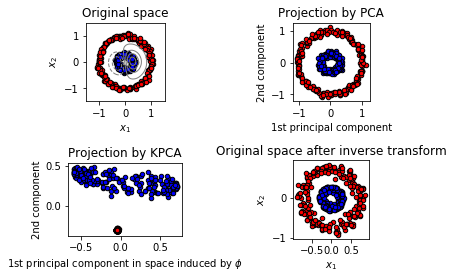

Example:

In [106]:
from sklearn.decomposition import KernelPCA

In [107]:
rbfpca = KernelPCA(n_components=2,kernel='rbf', gamma=0.05)

In [ ]:
rbfpca.fit_transform(X)

The ideal kernel and its gamma can be found by gridsearching kernel names, gamma values and fitting to a logistic regression classifier

All instances should be fitted to the logreg i.e. without any train_test_spilt

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [121]:
kpca = KernelPCA(n_components=2)
logreg = sklearn.linear_model.LogisticRegression(n_jobs=-1)

In [122]:
clf = Pipeline([('kpca',kpca),('logreg',logreg)])

In [123]:
param_grid = [{
    "kpca__gamma":np.linspace(0.3,0.5,10),
    "kpca__kernel":["rbf","sigmoid"]
}]

In [124]:
grid_search = GridSearchCV(clf,param_grid,cv=3).fit(X,y)

In [ ]:
grid_search.best_params_

### Another method to find best hyperparameters

It is fully unsupervised

Steps:<br>
select manual grid of hyperparameters, kernel and gamma<br>
start manual grid search<br>
take kpca<br>
take inverse kpca<br>
find reconstruction_error<br>
select best params on finding minimum reconstruction error

# LLE: Locally Linear Embedding

Very powerful non-linear dimensionality reduction(NLDR) technique

It is manifold learning technique that does not rely on projections like pca

It works by measuring how each training instance linearly relates to its closest neighbours and then looking for a low-dimensional representation where these local relationships are best preserved

It will only work with less noise

In [125]:
from sklearn.manifold import LocallyLinearEmbedding

In [126]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

In [128]:
X_reduced = lle.fit_transform(X_train[0])

# Other Dimensionality Reduction Techniques

1. Multidimensional Scaling(MDS)<br>
2. Isomap<br>
3. t-Distributed Stochastic Neighbor Embedding<br>
4. Linear Discriminant Analysis